In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import re
from pandas._libs.interval import Interval

In [2]:
path = Path('../Data/')

In [3]:
user_a = pd.read_csv(path / "prod_A.csv")
user_b = pd.read_csv(path / "prod_B.csv")
user = pd.read_csv(path / "user_data.csv")

In [4]:
user_a.shape, user_b.shape, user.shape

((678802, 2), (233853, 2), (600000, 5))

In [5]:
user_a.head(2), user_b.head(2), user.head(2)

(           ds   userid
 0  2020-01-01  3384044
 1  2020-01-01  5543378,
            ds   userid
 0  2020-01-01  3384044
 1  2020-01-01  5543378,
    user_id country  age gender  start_date
 0  9541124      DK   22   male  2018-05-05
 1  5946065      US   15   male  2018-01-24)

## 1. What does the average FB user look like?

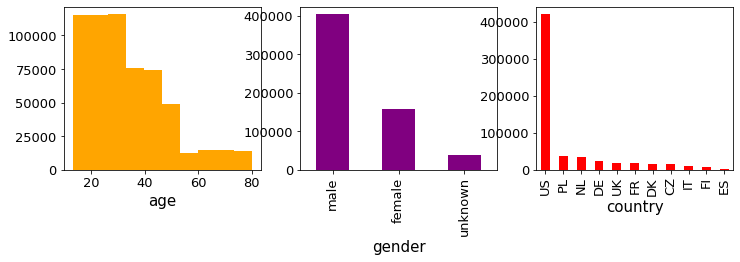

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].hist(user['age'], color='orange', density=False)
user['gender'].value_counts().plot(kind='bar', ax=ax[1], color='purple')
user['country'].value_counts().plot(kind='bar', ax=ax[2], color='red')

x_label = ['age', 'gender', 'country']
for i, ax_ in enumerate(ax):
    ax_.tick_params(labelsize=13)
    ax_.set_xlabel(x_label[i], fontsize=15)


plt.show()

In [7]:
print(user['age'].median(), user['age'].mean(), user['age'].std()) 

31.0 33.28667166666666 15.020404689728066


The typical Fb user is from the US, has median age 31 and is around 2.5 times more likely to be a man than a woman

## 2. How do users of each Product differ to the average user?

In [8]:
user = user.rename(columns={'user_id': 'userid'})
user.head(2)

userid country  age gender  start_date
0  9541124      DK   22   male  2018-05-05
1  5946065      US   15   male  2018-01-24

In [9]:
user_a_tot = user.merge(user_a, on='userid', how='right')

In [10]:
user_a_tot.head(2)

userid country  age gender  start_date          ds
0  5946065      US   15   male  2018-01-24  2020-03-08
1  5533917      US   70   male  2018-03-07  2020-01-11

In [11]:
user_a_tot.shape

(678802, 6)

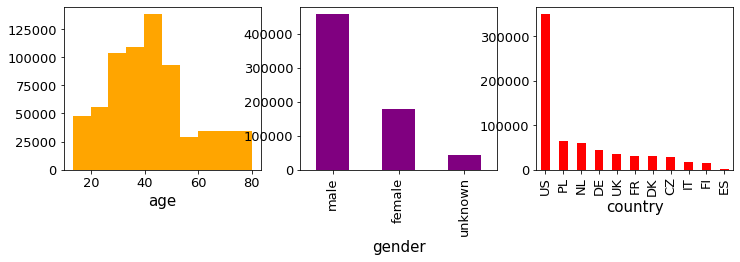

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].hist(user_a_tot['age'], color='orange', density=False)
user_a_tot['gender'].value_counts().plot(kind='bar', ax=ax[1], color='purple')
user_a_tot['country'].value_counts().plot(kind='bar', ax=ax[2], color='red')

x_label = ['age', 'gender', 'country']
for i, ax_ in enumerate(ax):
    ax_.tick_params(labelsize=13)
    ax_.set_xlabel(x_label[i], fontsize=15)


plt.show()

In [13]:
mean_a = user_a_tot['age'].mean()
median_a = user_a_tot['age'].median()

In [14]:
mean_a, median_a

(41.99867560790923, 41.0)

In [15]:
user_b_tot = user.merge(user_b, on='userid', how='inner')

In [16]:
user_b_tot.head(2)

userid country  age gender  start_date          ds
0  9541124      DK   22   male  2018-05-05  2020-10-25
1  5533917      US   70   male  2018-03-07  2020-08-20

In [17]:
user_b_tot.shape

(233853, 6)

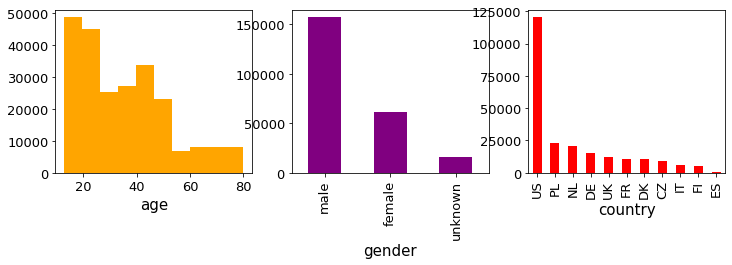

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].hist(user_b_tot['age'], color='orange', density=False)
user_b_tot['gender'].value_counts().plot(kind='bar', ax=ax[1], color='purple')
user_b_tot['country'].value_counts().plot(kind='bar', ax=ax[2], color='red')

x_label = ['age', 'gender', 'country']
for i, ax_ in enumerate(ax):
    ax_.tick_params(labelsize=13)
    ax_.set_xlabel(x_label[i], fontsize=15)


plt.show()

In [19]:
mean_b = user_b_tot['age'].mean()
median_b = user_b_tot['age'].median()

In [20]:
mean_b, median_b

(35.09190388834011, 33.0)

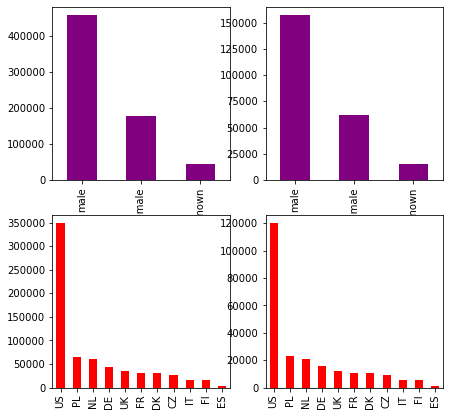

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))

user_a_tot['gender'].value_counts().plot(kind='bar', ax=ax[0,0], color='purple')
user_a_tot['country'].value_counts().plot(kind='bar', ax=ax[1,0], color='red')

user_b_tot['gender'].value_counts().plot(kind='bar', ax=ax[0,1], color='purple')
user_b_tot['country'].value_counts().plot(kind='bar', ax=ax[1,1], color='red')

x_label = ['age', 'gender', 'country']
#for i, ax_ in enumerate(ax[]):
#    ax_.tick_params(labelsize=13)
#    ax_.set_xlabel(x_label[i], fontsize=15)

The large majority of customers of whom we have data are from the US. Users who purchase B are typically younger than those who buy A - the median ages being respectively 35 and 41 yo. Lastly, users who purchase either product are roughly 3 times more likely to male than females.

## 3. What is the growth of both products? Also analyse trends in age/gender

In [22]:
#idx = pd.IndexSlice

In [23]:
user_a['count'], user_b['count'] = 1, 1
user_a['prod'], user_b['prod'] = 'a', 'b'

In [24]:
user_a

ds   userid  count prod
0       2020-01-01  3384044      1    a
1       2020-01-01  5543378      1    a
2       2020-01-01  5773857      1    a
3       2020-01-01  5526092      1    a
4       2020-01-01  6972245      1    a
...            ...      ...    ...  ...
678797  2020-09-10  7873089      1    a
678798  2020-09-10  7860477      1    a
678799  2020-09-10  9933348      1    a
678800  2020-09-10  4381661      1    a
678801  2020-09-10  9093807      1    a

[678802 rows x 4 columns]

In [25]:
users = user_a.append(user_b, ignore_index=False)

In [26]:
users

ds   userid  count prod
0       2020-01-01  3384044      1    a
1       2020-01-01  5543378      1    a
2       2020-01-01  5773857      1    a
3       2020-01-01  5526092      1    a
4       2020-01-01  6972245      1    a
...            ...      ...    ...  ...
233848  2020-11-01  6567698      1    b
233849  2020-11-01  9011741      1    b
233850  2020-11-01  8801670      1    b
233851  2020-11-01  8303284      1    b
233852  2020-11-01  5768588      1    b

[912655 rows x 4 columns]

In [27]:
user_tot = users.merge(user, how='left', on='userid')

In [28]:
user_tot.shape

(912655, 8)

In [29]:
user_tot.head(2)

ds   userid  count prod country  age  gender  start_date
0  2020-01-01  3384044      1    a      US   19    male  2018-04-23
1  2020-01-01  5543378      1    a      US   22  female  2018-01-03

In [30]:
user_tot.age.describe()

count    912655.000000
mean         40.228928
std          16.247357
min          13.000000
25%          28.000000
50%          39.000000
75%          49.000000
max          80.000000
Name: age, dtype: float64

In [31]:
age_groups = [12, 25, 40, 50, 80]

user_tot['age_group'] = pd.cut(user_tot.age, age_groups, right=True)

In [32]:
user_tot.shape

(912655, 9)

In [33]:
user_tot.head(2)

ds   userid  count prod country  age  gender  start_date age_group
0  2020-01-01  3384044      1    a      US   19    male  2018-04-23  (12, 25]
1  2020-01-01  5543378      1    a      US   22  female  2018-01-03  (12, 25]

In [34]:
user_agg = user_tot.drop(columns=['userid', 'age']).\
groupby(['ds', 'age_group', 'prod', 'gender', 'country']).sum()

In [35]:
user_agg

count
ds         age_group prod gender  country       
2020-01-01 (12, 25]  a    female  CZ         3.0
                                  DE         4.0
                                  DK         4.0
                                  ES         NaN
                                  FI         NaN
...                                          ...
2020-11-01 (50, 80]  b    unknown IT         1.0
                                  NL         1.0
                                  PL         NaN
                                  UK         1.0
                                  US         8.0

[80784 rows x 1 columns]

Text(0, 0.5, '# purchases')

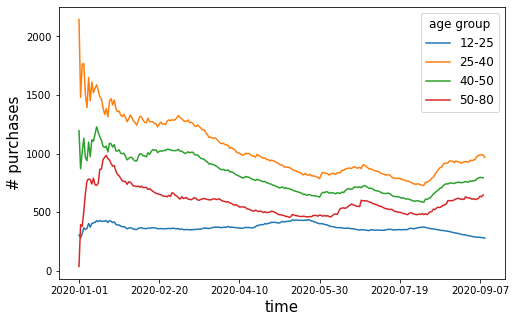

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

span = 100

for i in range(len(age_groups)-1):
    mean = user_agg.xs((Interval(age_groups[i], age_groups[i+1]), 'a'), level=(1, 2)).\
    dropna().groupby(['ds']).sum().ewm(span=span, ignore_na=True).mean() 
    std = user_agg.xs((Interval(age_groups[i], age_groups[i+1]), 'a'), level=(1, 2)).\
    dropna().groupby(['ds']).sum().ewm(span=span).std()
    
    mean.plot(y='count', ax=ax, label=str(age_groups[i])+'-'+str(age_groups[i+1]))
    
#     ax.fill_between(
#     mean.index, 
#     (mean+std)['count'].values,
#     (mean-std)['count'].values,
#     #color='blue',
#     alpha=0.1,
#     #label='$\pm$ std'
#     )
    
    
#ax.tick_params(labelsize=14)
ax.legend(title='age group', fontsize=12, title_fontsize=12)
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('# purchases', fontsize=15)

Text(0, 0.5, '# purchases')

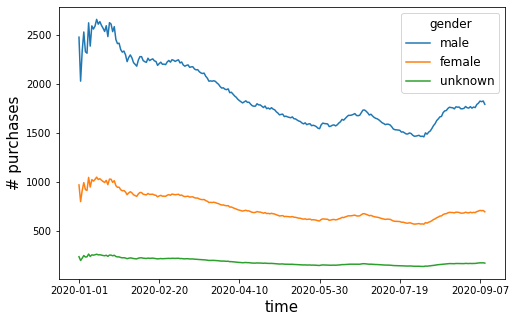

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

span = 100

for gender in ['male', 'female', 'unknown']:
    mean = user_agg.xs((gender, 'a'), level=(3, 2)).dropna().groupby(['ds']).sum()\
    .ewm(span=span).mean() 
    std = user_agg.xs((gender, 'a'), level=(3, 2)).dropna().groupby(['ds']).sum()\
    .ewm(span=span).std()
    
    mean.plot(y='count', ax=ax, label=gender)
    
#     ax.fill_between(
#     mean.index, 
#     (mean+std)['count'].values,
#     (mean-std)['count'].values,
#     #color='blue',
#     alpha=0.1,
#     #label='$\pm$ std'
#     )
    
    
#ax.tick_params(labelsize=14)
ax.legend(title='gender', fontsize=12, title_fontsize=12)
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('# purchases', fontsize=15)

Product A exhibits a seasonal trend, being it more popular during the cold season and less sought-after in summer, with a low peak around May. That being said, it is not popular among the youngest (age group 12-25), and the trend does not vary significantly between different genders.

Text(0, 0.5, '# purchases')

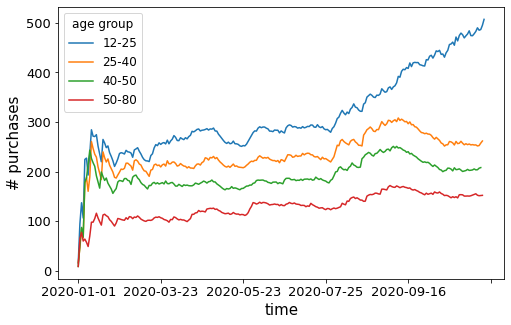

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

span = 100

for i in range(len(age_groups)-1):
    mean = user_agg.xs((Interval(age_groups[i], age_groups[i+1]), 'b'), level=(1, 2))\
    .dropna().groupby(['ds']).sum().ewm(span=span).mean() 
    std = user_agg.xs((Interval(age_groups[i], age_groups[i+1]), 'b'), level=(1, 2))\
    .dropna().groupby(['ds']).sum().ewm(span=span).std()
    
    mean.plot(y='count', ax=ax, label=str(age_groups[i])+'-'+str(age_groups[i+1]))
    
#     ax.fill_between(
#     mean.index, 
#     (mean+std)['count'].values,
#     (mean-std)['count'].values,
#     #color='blue',
#     alpha=0.1,
#     #label='$\pm$ std'
#     )
    
ax.tick_params(labelsize=13)
    
ax.legend(title='age group', fontsize=12, title_fontsize=12)
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('# purchases', fontsize=15)

Text(0, 0.5, '# purchases')

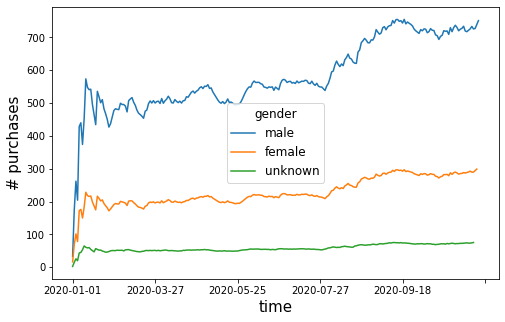

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

span = 100

for gender in ['male', 'female', 'unknown']:
    mean = user_agg.xs((gender, 'b'), level=(3, 2)).dropna().groupby(['ds']).sum()\
    .ewm(span=span).mean() 
    std = user_agg.xs((gender, 'b'), level=(3, 2)).dropna().groupby(['ds']).sum()\
    .ewm(span=span).std()
    
    mean.plot(y='count', ax=ax, label=gender)
    
#     ax.fill_between(
#     mean.index, 
#     (mean+std)['count'].values,
#     (mean-std)['count'].values,
#     #color='blue',
#     alpha=0.1,
#     #label='$\pm$ std'
#     )
    
    
#ax.tick_params(labelsize=14)
ax.legend(title='gender', fontsize=12, title_fontsize=12)
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('# purchases', fontsize=15)

Product B purchases have a slow increase for ages from 25 to 80, whereas they show a clear and rapid increase from the end of July onward among 12 to 25 year-olds. A similar behavior can be found in different genders: while among females there is a slow increase in #purchases over time, such increase is much steeper among males.

We also observe that the data we have covers product B purchases for a larger time span with respect to A.

Let's check whether the trends above are driven by US data.

Text(0, 0.5, '# purchases')

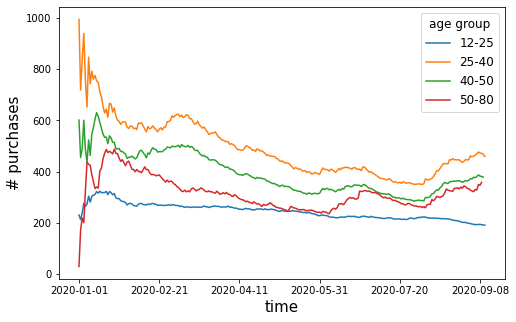

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

span = 100

for i in range(len(age_groups)-1):
    mean = user_agg.xs((Interval(age_groups[i], age_groups[i+1]), 'a', 'US'), level=(1, 2, 4)).dropna().groupby(['ds']).sum()\
    .ewm(span=span).mean() 
    std = user_agg.xs((Interval(age_groups[i], age_groups[i+1]), 'a', 'US'), level=(1, 2, 4)).dropna().groupby(['ds']).sum()\
    .ewm(span=span).std()
    
    mean.plot(y='count', ax=ax, label=str(age_groups[i])+'-'+str(age_groups[i+1]))
    
#     ax.fill_between(
#     mean.index, 
#     (mean+std)['count'].values,
#     (mean-std)['count'].values,
#     #color='blue',
#     alpha=0.1,
#     #label='$\pm$ std'
#     )
    
    
ax.legend(title='age group', fontsize=12, title_fontsize=12)
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('# purchases', fontsize=15)

Text(0, 0.5, '# purchases')

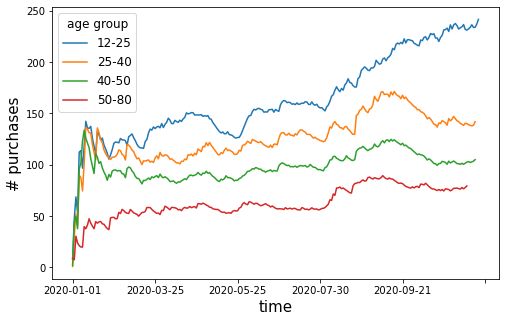

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

span = 100

for i in range(len(age_groups)-1):
    mean = user_agg.xs((Interval(age_groups[i], age_groups[i+1]), 'b', 'US'), level=(1, 2, 4)).dropna().groupby(['ds']).sum()\
    .ewm(span=span).mean() 
    std = user_agg.xs((Interval(age_groups[i], age_groups[i+1]), 'b', 'US'), level=(1, 2, 4)).dropna().groupby(['ds']).sum()\
    .ewm(span=span).std()
    
    mean.plot(y='count', ax=ax, label=str(age_groups[i])+'-'+str(age_groups[i+1]))
    
#     ax.fill_between(
#     mean.index, 
#     (mean+std)['count'].values,
#     (mean-std)['count'].values,
#     #color='blue',
#     alpha=0.1,
#     #label='$\pm$ std'
#     )
    
    
ax.legend(title='age group', fontsize=12, title_fontsize=12)
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('# purchases', fontsize=15)

These trends are driven by US data. This is expected, since a large fraction of it comes from it. It is also interesting to look at this some more.

In [42]:
user['count'] = 1

In [43]:
count_by_country = user_tot.\
drop_duplicates(subset=['userid', 'prod'])\
[['country', 'count', 'prod']].groupby(['country', 'prod']).sum()/\
user.drop_duplicates(subset='userid')\
[['country', 'count']].groupby('country').sum()

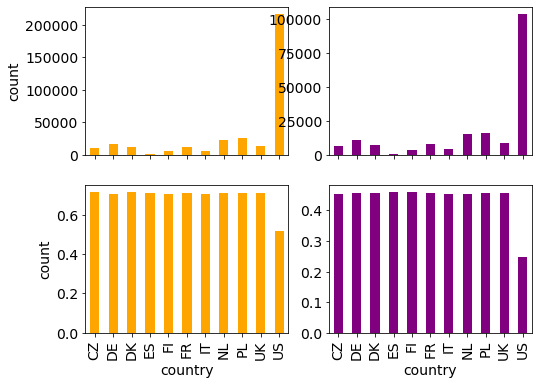

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True)

user_tot.drop_duplicates(subset=['userid', 'prod'])\
[['country', 'count', 'prod']].groupby(['country', 'prod']).sum().xs('a', level=1)\
.plot(y='count', kind='bar', color='orange', ax=ax[0,0])
user_tot.drop_duplicates(subset=['userid', 'prod'])\
[['country', 'count', 'prod']].groupby(['country', 'prod']).sum().xs('b', level=1)\
.plot(y='count', kind='bar', color='purple', ax=ax[0,1])

count_by_country.xs('a', level=1).plot(y='count', kind='bar', color='orange', ax=ax[1,0])
count_by_country.xs('b', level=1).plot(y='count', kind='bar', color='purple', ax=ax[1,1])

for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(labelsize=14)
        ax[i,j].legend().remove()
    ax[i,0].set_ylabel('count', fontsize=14)
    ax[1,i].set_xlabel('country', fontsize=14)
#plt.legend()

From the plot above it can be seen that, while the majority of users who buy both products are from US, this is only due to there being more US users in the database. In fact, the fraction of users who purchase both A and B per country is roughly the same for all countries except the US, for which is lower. In other words, US users buy, in proportion, less of both products compared to users from the other countries in the database.

## What is the probability of buying a second Product, given a user has already bought one?

In [45]:
user_m = user_tot.sort_values(by='ds')[['userid', 'count', 'prod']].groupby(['userid', 'prod']).sum()

In [46]:
user_m.shape

(531050, 1)

### P(buying A | bought A)

In [47]:
user_m.loc[user_m['count'] > 1].xs('a', level=1).shape[0] /\
user_m.xs('a', level=1).shape[0]

0.497981364209428

### P(buying B | bought B)

In [48]:
user_m.loc[user_m['count'] > 1].xs('b', level=1).shape[0] /\
user_m.xs('b', level=1).shape[0]

0.21236997016369646

In [49]:
count_a = user_m.xs('a', level=1)
count_b = user_m.xs('b', level=1)

In [50]:
count = count_a.merge(count_b, how='outer', on='userid', suffixes=['_a', '_b'])

### P(buying A | bought B)

In [51]:
count.loc[(count['count_a'] > 0) & (count['count_b'] > 0)].shape[0]/\
count.loc[count['count_b'] > 0].shape[0]

0.6391258769454077

### P(buying B | bought A)

In [52]:
count.loc[(count['count_a'] > 0) & (count['count_b'] > 0)].shape[0]/\
count.loc[count['count_a'] > 0].shape[0]

0.34456504412595823

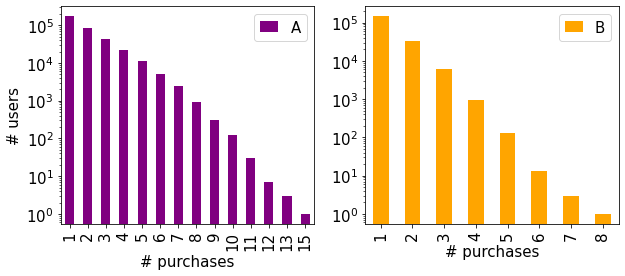

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

user_m.xs('a', level=1)['count'].value_counts().plot(kind='bar', logy=True, ax=ax[0], color='purple', label='A')
user_m.xs('b', level=1)['count'].value_counts().plot(kind='bar', logy=True, ax=ax[1], color='orange', label='B')

ax[0].set_ylabel('# users', fontsize=15)
for ax_ in ax:
    ax_.tick_params(labelsize=15)
    ax_.set_xlabel('# purchases', fontsize=15)
    ax_.legend(fontsize=15, handlelength=1.2)

Users are 2.5 half more likely to re-purchase A than B. Also, they are roughly twice as likely to buy A given B than viceversa.

## What are the growth opportunities for each Product, and what segment(s) should we target in any marketing campaigns?

In [184]:
users_ = user_a[['userid', 'prod']].merge(user_b[['userid', 'prod']], how='outer')

In [185]:
users_

userid prod
0       3384044    a
1       3384044    a
2       5543378    a
3       5773857    a
4       5526092    a
...         ...  ...
912650  2334992    b
912651  8892523    b
912652  5193441    b
912653  9011741    b
912654  8303284    b

[912655 rows x 2 columns]

In [187]:
users_.drop_duplicates(inplace=True)

In [190]:
users_ = users_.merge(user, how='outer', on=['userid'])

In [196]:
users_.shape

(718887, 7)

In [216]:
ages = np.sort(users_.age.unique())

In [217]:
cond = 'age'
prod_ = ['a', 'b']

frac_prod = np.zeros((ages.shape[0], 2))

In [218]:
for n, age in enumerate(ages):
    for i, prod in enumerate(prod_):
        frac_prod[n,i] = users_.loc[(users_[cond] == age) & (users_['prod'] == prod)].shape[0]/\
        users_.loc[(users_[cond] == age)].shape[0]

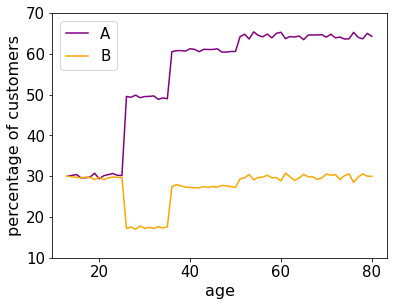

In [230]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))

colors = ['purple', 'orange']
for i, prod in enumerate(prod_):
    ax.plot(ages, frac_prod[:,i]*100, color=colors[i], label=prod.upper())
    
ax.tick_params(labelsize=15)
ax.set_xlabel('age', fontsize=16)
ax.set_ylabel('percentage of customers', fontsize=16)
ax.set_yticks(np.arange(10, 80, 10))

ax.legend(fontsize=15, handlelength=1.5)

In [239]:
genders = np.sort(users_.gender.unique())
genders

array(['female', 'male', 'unknown'], dtype=object)

In [240]:
frac_gend = np.zeros((genders.shape[0], 2))

In [241]:
for n, gender in enumerate(genders):
    for i, prod in enumerate(prod_):
        frac_gend[n,i] = users_.\
        loc[(users_['gender'] == gender) & (users_['prod'] == prod)].\
        shape[0] / users_.loc[(users_['gender'] == gender)].shape[0]

In [242]:
frac_gend

array([[0.47985202, 0.25931874],
       [0.47988972, 0.25854004],
       [0.48107155, 0.25868882]])

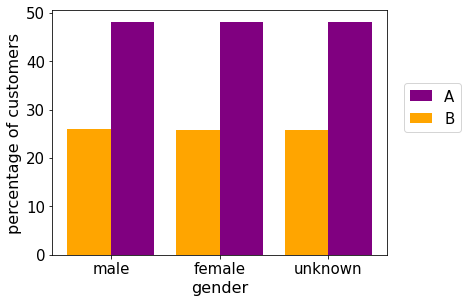

In [262]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))

x = [1, 3, 5]
delta_x = 0.4*np.ones(3)
colors = ['purple', 'orange', 'red']
for i, prod in enumerate(prod_):
    ax.bar(x + (-1)**i*delta_x, frac_gend[:,i]*100, color=colors[i], label=prod.upper())

    

ax.tick_params(labelsize=15)
ax.set_xlabel('gender', fontsize=16)
ax.set_ylabel('percentage of customers', fontsize=16)
plt.xticks(x, ('female', 'male', 'unknown'))

ax.legend(fontsize=15, handlelength=1.5, loc=(1.05, 0.5))

The biggest growth opportunities is for product B. As we have seen before, the number of purchases of B shows a clear trend upward among the youngest segment of the population (13-25 yo). Also, we can see from the penultimate plot above that B is only purchasd by some 30% of the customers of virtually any age group, with the exception of the (25, 35) segment, where this percentage is even lower. Further, the last bar plot above shows how B is purchased less than A among all genders. All this gives B large opportunity for growth. 
Product A has a larger sales volume then B at the moment though its position is more stagnant. It is preferred mainly by the older population, where the percentage of customers who buy it is > 60%) and it is becomes less and less popular the younger the population under scrutiny. It has a somewhat seasonal trend, albeit with small fluctuations. These information point towards A being less dynamic in the long term.